Importing Libraries


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
#

In [27]:
from google.colab import files

uploaded=files.upload()

Saving TvMarketing.csv to TvMarketing (4).csv


In [28]:
import io
DF=pd.read_csv(io.BytesIO(uploaded['TvMarketing (4).csv']))

DF

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [29]:
DF.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [30]:
DF.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [31]:
DF.isnull().sum()

,0
TV,0
Sales,0


In [32]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [33]:
DF.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Visulatization


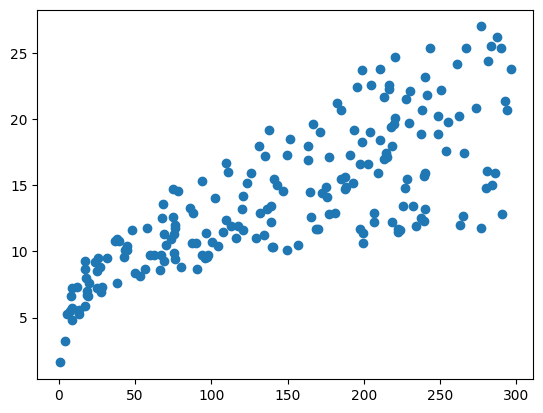

In [34]:
plt.scatter(DF['TV'],DF['Sales'])

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
-3.459892082366168e+46 1.7554653899724964e+46


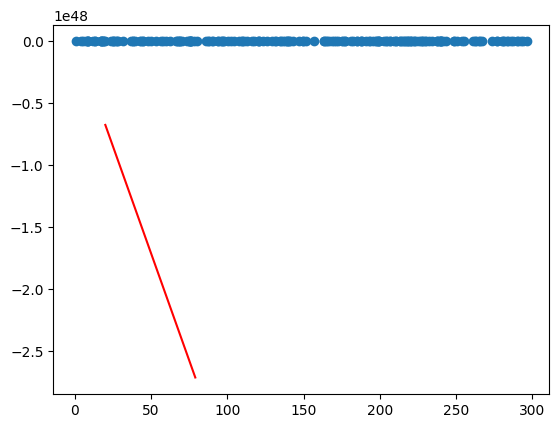

In [37]:
def MSE(m,b,ponits):
  total_error =0
  for i in range(len(ponits)):
    x=ponits.loc[i,'TV']
    y=ponits.loc[i,'Sales']
    total_error +=(y-(m*x+b))**2
  return total_error/float(len(ponits))

def gradient_descent(m_now,b_now,points,learning_rate):
  m_gradient=0
  b_gradient=0
  n=len(points)
  for i in range(n):
    x=points.loc[i,'TV']
    y=points.loc[i,'Sales']

    m_gradient += -(2/n)*x*(y-(m_now*x+b_now))
    b_gradient += -(2/n)*y-(m_now*x+b_now)

  return m_gradient, b_gradient


learning_rate=0.001
m=0
b=0

learning_rate=0.001
epochs= 500


for i in range(epochs):
  if i % 50 ==0:
    print(f"Epoch: {i}")

    m,b=(gradient_descent(m,b,DF,learning_rate))



print(m,b)

plt.scatter(DF['TV'],DF['Sales'])
plt.plot(list(range(20,80)),[m* x + b for x in range(20,80)],color='red')
plt.show()